<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/MACHINE%20LEARNING%20Y%20DEEP%20LEARNING/4_MejorasEntrenamientoDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Las gradientes sirven para actualizar los pesos y tener algun aprendizaje
#las gradientes se hacen mas pequeñas en las capas inferiores y no actualiza los pesos por ende no aprende
#los pesos se van actulizando con la informacion de la gradientes

#**Mejoras en el entrenamiento de Modelos de Deep Learning**

##**Problemas al entrenar modelos de Deep Learning**

- Es posible que se enfrente el problema de que los gradientes son cada vez más pequeños o grandes durante el entrenamiento de DNN.
- Ambos problemas hacen que sea muy difícil entrenar las capas inferiores.
- Es posible que no tenga suficientes datos de entrenamiento para una red tan grande o sería demasiado costoso etiquetarlo.
- El entrenamiento puede ser extremadamente lento, se superar usando un mejor optimizador
- Un modelo con millones de parámetros correría un grave riesgo de overfitting, especialmente si no hay suficientes datos de entrenamiento o hay ruido(se usa las tecnicas de regularizacion para lidiar con el overfitting)


In [3]:
import sys
assert sys.version_info >= (3, 7)

from packaging import version
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")

import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
#las gradientes que se desvanecen y las gradientes que explotan

##**Los problemas de Vanishing/Exploding Gradients**

- La segunda fase del algoritmo backpropagation va de la capa de salida a la capa de entrada, propagando el gradiente de error a lo largo del camino. Una vez que el algoritmo ha calculado el gradiente
de la función de costo con respecto a cada parámetro de la red, utiliza estos gradientes para actualizar cada parámetro con un paso de descenso de gradiente.


- Desafortunadamente, las gradientes a menudo se vuelven cada vez más pequeñas a medida que el algoritmo progresa hasta las capas inferiores. Como resultado, el descenso del gradiente deja los pesos de las capas inferiores prácticamente sin cambios, y el modelo no converge a una buena solución: *Vanishing gradients*


- En algunos casos puede ocurrir lo contrario, los gradientes
puede crecer cada vez más y las capas tienen actualizaciones
 de pesos increíblemente grandes, el algoritmo diverge: *Exploding gradientes*. Problema común en RNNs.

- En general, redes neuronales profundas sufren de gradientes inestables; diferentes capas pueden aprender a velocidades diferentes.

**Origen del Problema**

- Xavier Glorot y Yoshua Bengio (2010) encontraron el origen del problema: la combinación de la popular función de activación sigmoidea (logística) y la técnica de inicialización de peso que era más popular en ese momento (es decir, un distribución normal con media 0 y desviación estándar 1).

- Demostraron que con esta función de activación y este esquema de inicialización, la varianza de las salidas de cada capa es mucho mayor que la varianza de sus entradas. Conforme se hace forward, la varianza se mantiene aumentando después de cada capa hasta que la función de activación se satura en las capas superiores(cuando los valores son grandes la salida es cero o 1) la deriva de 1 es cero, los pesos son cero y no aprende

- Esta saturación empeora por el hecho de que la función sigmoidea
tiene una media de 0.5, no 0 (la función tangente hiperbólica tiene una media de 0 y se comporta ligeramente mejor que la función sigmoidea en DL).


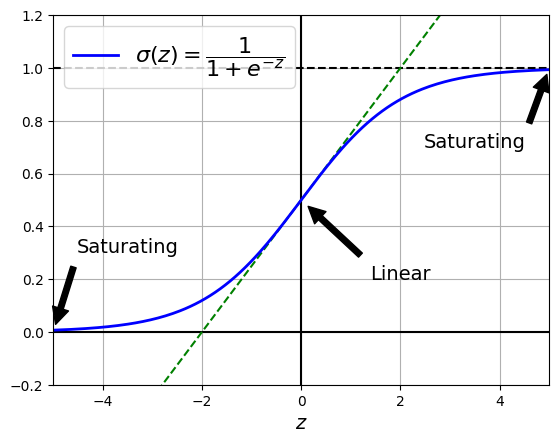

In [4]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, sigmoid(z), "b-", linewidth=2,
         label=r"$\sigma(z) = \dfrac{1}{1+e^{-z}}$")
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props,
             fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props,
             fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props,
             fontsize=14, ha="center")
plt.grid(True)
plt.axis([-5, 5, -0.2, 1.2])
plt.xlabel("$z$")
plt.legend(loc="upper left", fontsize=16)

plt.show()


Si observa la función de activación sigmoidea puede ver
que cuando las entradas se vuelven grandes (negativas o positivas), la función se satura a 0 o 1, con una derivada extremadamente cercana a 0 (es decir, la curva es plana en ambos extremos).

Por lo tanto, cuando se aplica backpropagation, prácticamente no tiene gradiente. Al continuar con el proceso, el poco gradiente que existía se diluye a medida que backpropagation avanza desde las capas superiores, así que realmente no queda nada para las capas inferiores.

**Solución: Glorot y He Initialization**

- Glorot y Bengio proponen una manera de aliviar significativamente
el problema de los gradientes inestables.
- Se necesita que la señal fluya correctamente en ambas direcciones: en la dirección de avance al hacer predicciones, y en la dirección inversa cuando se propagan gradientes hacia atrás.
- No se desea que la señal se apague, ni que explote y
sature.
- Para que la señal fluya correctamente, se necesita que la
la varianza de las salidas de cada capa sea igual a la varianza de sus
entradas, y necesitamos que los gradientes tengan la misma varianza antes y después.
- En realidad no es posible garantizar ambas cosas a menos que las capas tenga el mismo número de entradas y
salidas (estos números se denominan fan de entrada y fan de salida de la capa).
- Glorot y Bengio propusieron que los pesos de conexión de cada capa deben ser inicializados aleatoriamente como se describe en la Ecuación 11-1, donde $fan_{avg} = (fan_{in} +
fan_{out}) / 2$.
- Esta estrategia de inicialización se llama inicialización de Xavier o Inicialización de Glorot.

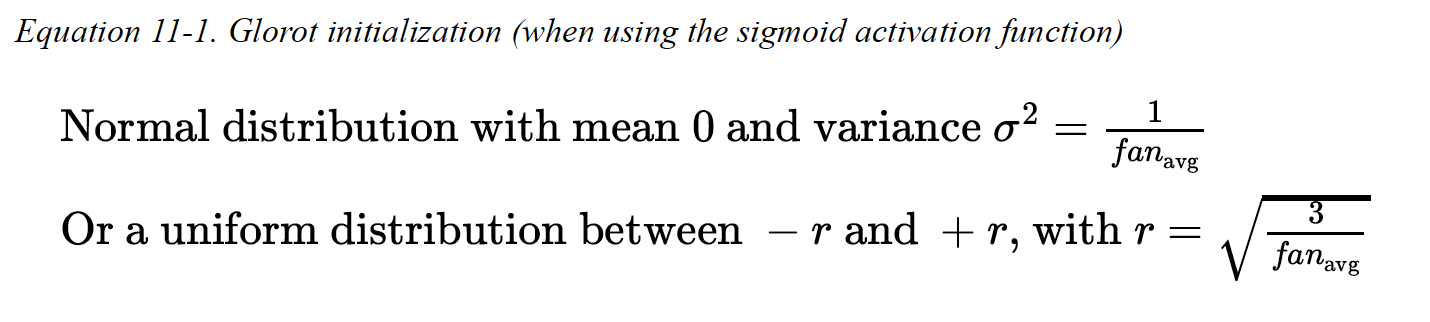

- Si reemplaza $fan_{avg}$ por $fan_{in}$ se obtiene una inicialización que Yann LeCun propuso en los años 1990.
- Los investigadores tardaron más de una década en darse cuenta de la importancia de este truco.
- **El uso de la inicialización de Glorot puede acelerar considerablemente el entrenamiento y es una de las prácticas que condujo al éxito del aprendizaje profundo**.

Algunos autores han propuesto estrategias similares para funciones de activación específicas:

In [ ]:
#con esta estrategia mas las funciones de activacion desde el 2012 se tuvo mejores modelos con las CNN

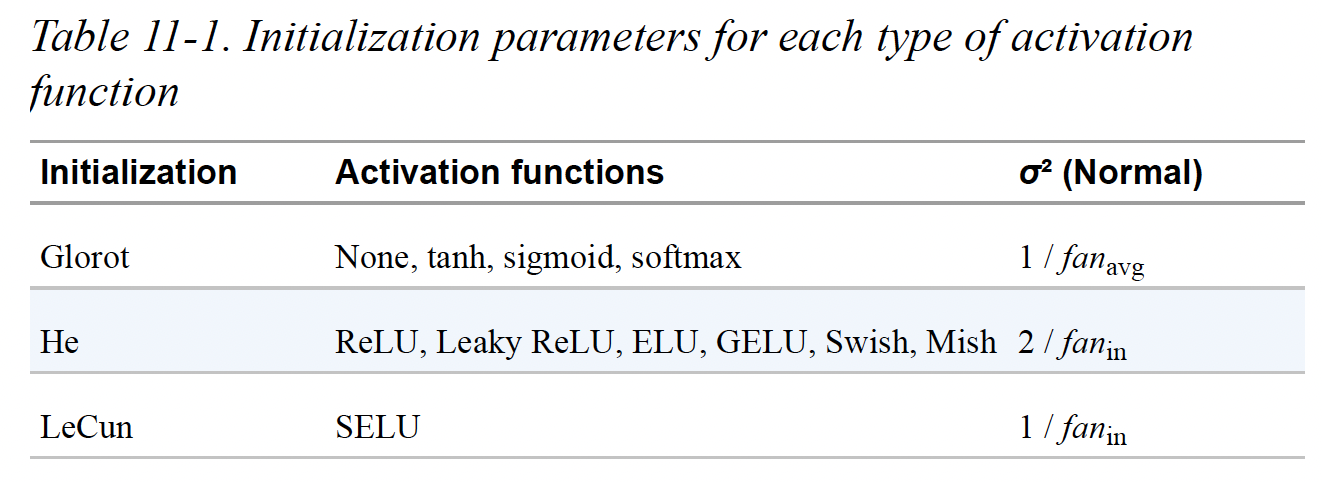

In [ ]:
#SELU es una ELU escalable
#La mayor parte en deep learning se va usar la inicializacion He, con ello se normalizara las varianzas de la entrada y salida

De forma predeterminada, Keras utiliza la inicialización de Glorot con una distribución uniforme. Cuando se crea una capa se puede cambiar a la inicialización de He  ``kernel_initializer= "he_uniform"`` o
``kernel_initializer="he_normal"`` de esta forma:


In [5]:
dense = tf.keras.layers.Dense(50, activation="relu",
                              kernel_initializer="he_normal")#puede ser una distribucion normal o uniforme

In [6]:
he_avg_init = tf.keras.initializers.VarianceScaling(scale=2., mode="fan_avg",
                                                    distribution="uniform")#es un He con valor uniforme los
                                                    #valores van desde un +r y -r

dense = tf.keras.layers.Dense(50, activation="sigmoid",
                              kernel_initializer=he_avg_init)

##**Mejores Funciones de Activación**


Hay funciones de activación que se comportan mucho mejor en redes neuronales profundas. En particular, la función de activación ReLU, principalmente porque **no satura** para valores positivos y también porque es muy rápida de calcular.

- Desafortunadamente, la función de activación de ReLU no es perfecta. Sufre de un problema conocido como los *dying ReLUs*: durante el entrenamiento, algunas neuronas
efectivamente "mueren", lo que significa que dejan de generar cualquier valor que no sea 0.

- En algunos casos, es posible que la mitad de las neuronas de una red estén muertas, especialmente si se utilizó una gran tasa de aprendizaje.

- Una neurona muere cuando su peso se actualiza de tal manera que la entrada de la función ReLU (la suma ponderada de las entradas de la neurona más su bias) es negativa para todas las instancias en el conjunto de entrenamiento.

- Cuando esto sucede, sigue devolviendo ceros, y gradiente descendiente no tiene efecto, porque el gradiente
de la función ReLU es cero cuando su entrada es negativa.

- Para resolver este problema, se utilizan variantes tales como la función Leaky ReLU.

**Leaky ReLU**

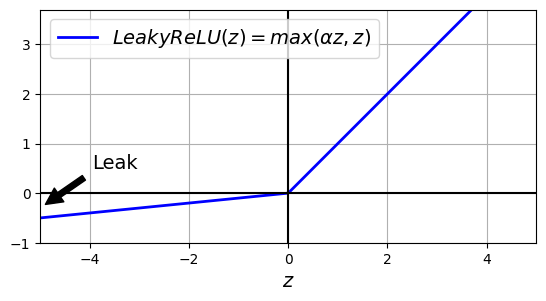

In [7]:
def leaky_relu(z, alpha):
    return np.maximum(alpha * z, z)

z = np.linspace(-5, 5, 200)
plt.plot(z, leaky_relu(z, 0.1), "b-", linewidth=2, label=r"$LeakyReLU(z) = max(\alpha z, z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-1, 3.7], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.3), arrowprops=props,
             fontsize=14, ha="center")
plt.xlabel("$z$")
plt.axis([-5, 5, -1, 3.7])
plt.gca().set_aspect("equal")
plt.legend()

plt.show()

- La función de activación de Leaky ReLU con fugas se define como $LeakyReLU(z) = max(\alpha z, z)$.
- El hiperparámetro $\alpha$ define cuánto la
función “fuga”: es la pendiente de la función para $z < 0$.

- Tener una pendiente para $z < 0$ garantiza que las Leaky ReLU nunca mueran; pueden entrar en un coma prolongado, pero tienen la oportunidad de despertar eventualmente.

- Bing Xu et al (2015) compararon variantes "Leaky" de la función de activación ReLU, y estas siempre superaron a las originales.

- Definir $\alpha = 0.2$ (grande) parece tener mejor rendimiento que $\alpha = 0,01$.

- También se evaluó el *randomized leaky ReLU* (RReLU), donde se selecciona $\alpha$ aleatoriamente en un rango dado durante el entrenamiento y se fija en un valor promedio durante la prueba.

- RReLU también funcionó bastante bien y actuó como
regularizador, disminuyendo el overfitting.

- Finalmente, se evaluó el *parametric leaky ReLU* (PReLU), donde $\alpha$ se aprende durante el entrenamiento: en lugar de ser un hiperparámetro, se convierte en un parámetro que se puede modificar mediante backpropagation.

- PReLU superó con creces a ReLU en grandes conjuntos de datos de imágenes, pero en conjuntos de datos más pequeños se corre el riesgo de overfitting.

Keras incluye las clases LeakyReLU y PReLU en el
Paquete tf.keras.layers. Al igual que con otras variantes de ReLU, se
debería usar la inicialización He con estos. Por ejemplo:

In [8]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2)  # defaults to alpha=0.3
dense = tf.keras.layers.Dense(50, activation=leaky_relu,
                              kernel_initializer="he_normal")

Si se prefiere, también se puedes usar LeakyReLU como una capa separada en el modelo; no hace ninguna diferencia para el entrenamiento y las predicciones:

In [9]:
model = tf.keras.models.Sequential([
    # [...]  # more layers
    tf.keras.layers.Dense(50, kernel_initializer="he_normal"),  # no activation
    tf.keras.layers.LeakyReLU(alpha=0.2),  # activation as a separate layer
    # [...]  # more layers
])

ReLU, Leaky ReLU y PReLU no son óptimas por el hecho de que no son
funciones suaves: sus derivadas cambian abruptamente (en $z = 0$). Este tipo de discontinuidad puede hacer que descenso de gradiente rebote alrededor del óptimo y ralentice la convergencia. Por eso fueron creadas algunas variantes suaves de ReLU:ELU y SELU.

**ELU y SELU**

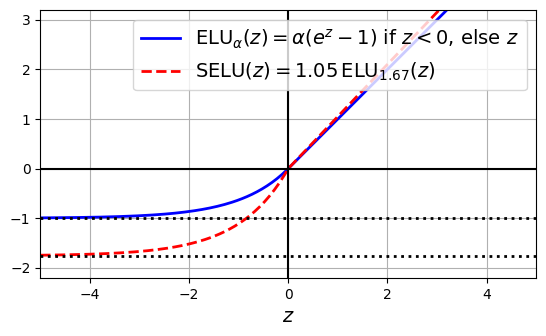

In [10]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1 / np.sqrt(2)) * np.exp(1 / 2) - 1)
scale_0_1 = (
    (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e))
    * np.sqrt(2 * np.pi)
    * (
        2 * erfc(np.sqrt(2)) * np.e ** 2
        + np.pi * erfc(1 / np.sqrt(2)) ** 2 * np.e
        - 2 * (2 + np.pi) * erfc(1 / np.sqrt(2)) * np.sqrt(np.e)
        + np.pi
        + 2
    ) ** (-1 / 2)
)

def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

z = np.linspace(-5, 5, 200)
plt.plot(z, elu(z), "b-", linewidth=2, label=r"ELU$_\alpha(z) = \alpha (e^z - 1)$ if $z < 0$, else $z$")
plt.plot(z, selu(z), "r--", linewidth=2, label=r"SELU$(z) = 1.05 \, $ELU$_{1.67}(z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k:', linewidth=2)
plt.plot([-5, 5], [-1.758, -1.758], 'k:', linewidth=2)
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-5, 5, -2.2, 3.2])
plt.xlabel("$z$")
plt.gca().set_aspect("equal")
plt.legend()
plt.show()

- Djork-Arné Clevert et al (2015). propusieron una nueva activación
función, llamada *exponential linear unit* (ELU).
- Superó a todas las variantes de ReLU, redujo el tiempo de entrenamiento y la red neuronal funcionó mejor en el conjunto de prueba. La ecuación muestra esta función de activación:

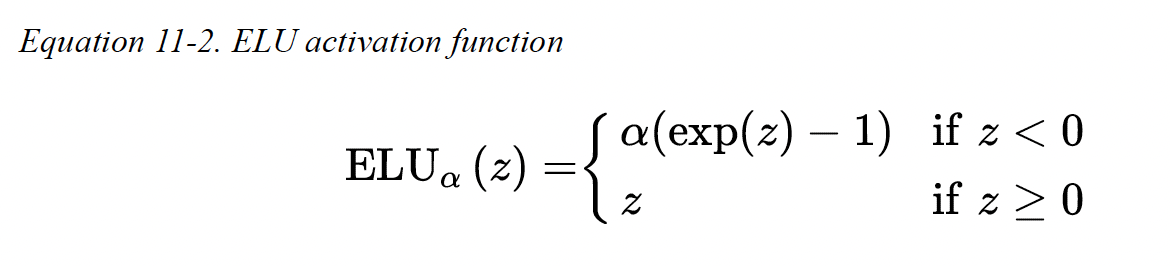

- Diferente de la RELU normal, asume valores negativos cuando $z < 0$, lo que permite que la unidad tenga una salida promedio más cercana a 0 y alivia el problema de la desaparición de gradientes.
- El hiperparámetro $\alpha$ generalmente está configurado en 1, pero se puede modificar a cualquier otro valor.
- Tiene un gradiente distinto de cero para $z <0$, lo que evita las neuronas muertas.

- El principal inconveniente de la función de activación ELU es que es más lento de calcular que ReLU y sus variantes (debido al uso de la exponencial función). Su tasa de convergencia más rápida durante el entrenamiento puede compensar ese cálculo lento, pero aún así, en el momento de la prueba una red ELU será un poco más lenta que una red ReLU.

**SELU**

- Günter Klambauer et al. (2017) propusieron la función (SELU): es una función de activación escalada a partir de ELU (aproximadamente 1,05 veces ELU, usando $\alpha \approx 1.67$).

- Los autores demostraron que si se construye una MLP exclusivamente de una pila de capas densas, y si todas las capas ocultas
usan la función de activación SELU, entonces la red se autonormalizará: la salida de cada capa tenderá a preservar una media de 0 y una desviación estándar de 1 durante el entrenamiento, lo que resuelve la desaparición/explosión de gradientes.

- La función de activación SELU supera otras funciones de activación para MLP, especialmente las redes profundas.

- Sin embargo, ciertas condiciones deben cumplirse para que se produzca la autonormalización:
-- Las características de entrada deben estar estandarizadas: media 0 y desviación estándar 1.
-- Los pesos de cada capa oculta deben inicializarse usando la inicialización normal de LeCun.
-- La propiedad de autonormalización solo está garantizada con MLPs. En RNNs o con redes con ``skip connections``(Wide and Deep nets), probablemente no supere a ELU.
--  No puede utilizar técnicas de regularización como $l_1,l_2$ o Dropout.


- Estas son limitaciones importantes, por lo que SELU no fue tan popular. Además, tres funciones de activación parecen superarla en la mayoría de las tareas: GELU, Swish y Mish.

Uso de SELU:

In [11]:
dense = tf.keras.layers.Dense(50, activation="selu",
                              kernel_initializer="lecun_normal")

**Ejemplo de una red autorregulada usando SELU**

Creemos una red neuronal para Fashion MNIST con 100 capas ocultas, usando la función de activación SELU:

In [12]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="selu",
                                    kernel_initializer="lecun_normal"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])


Ahora entrenémoslo. No olvide escalar las entradas a media 0 y desviación estándar 1:

In [14]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

4422102/4422102 [==============================] - 2s 0us/step


In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [17]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [18]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 66s 29ms/step - loss: 1.2668 - accuracy: 0.5206 - val_loss: 0.8950 - val_accuracy: 0.6676
Epoch 2/5
1719/1719 [==============================] - 48s 28ms/step - loss: 0.7995 - accuracy: 0.7022 - val_loss: 0.6511 - val_accuracy: 0.7652
Epoch 3/5
1719/1719 [==============================] - 46s 27ms/step - loss: 0.6217 - accuracy: 0.7750 - val_loss: 0.5927 - val_accuracy: 0.7946
Epoch 4/5
1719/1719 [==============================] - 42s 24ms/step - loss: 0.5542 - accuracy: 0.8052 - val_loss: 0.5403 - val_accuracy: 0.8184
Epoch 5/5
1719/1719 [==============================] - 42s 25ms/step - loss: 0.5033 - accuracy: 0.8251 - val_loss: 0.4976 - val_accuracy: 0.8250


La red logró aprender, a pesar de lo profunda que es. Ahora ver lo que sucede si intentamos usar la función de activación ReLU en su lugar:

In [19]:
tf.random.set_seed(42)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="relu",
                                    kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 41s 19ms/step - loss: 1.8622 - accuracy: 0.2351 - val_loss: 1.5185 - val_accuracy: 0.3648
Epoch 2/5
1719/1719 [==============================] - 32s 19ms/step - loss: 1.2848 - accuracy: 0.4689 - val_loss: 1.0912 - val_accuracy: 0.5278
Epoch 3/5
1719/1719 [==============================] - 32s 18ms/step - loss: 1.0132 - accuracy: 0.5891 - val_loss: 0.8854 - val_accuracy: 0.6844
Epoch 4/5
1719/1719 [==============================] - 32s 19ms/step - loss: 0.8753 - accuracy: 0.6609 - val_loss: 0.7347 - val_accuracy: 0.7306
Epoch 5/5
1719/1719 [==============================] - 33s 19ms/step - loss: 0.8955 - accuracy: 0.6499 - val_loss: 0.7519 - val_accuracy: 0.7380


No es nada bueno, sufrimos el problema de los gradientes que desaparecen o explotan.

**GELU, Swish y Mish**

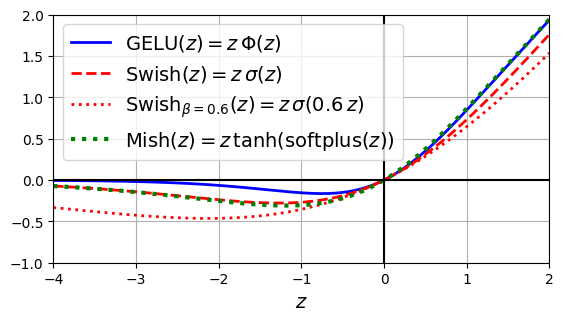

In [ ]:
def swish(z, beta=1):
    return z * sigmoid(beta * z)

def approx_gelu(z):
    return swish(z, beta=1.702)

def softplus(z):
    return np.log(1 + np.exp(z))

def mish(z):
    return z * np.tanh(softplus(z))

z = np.linspace(-4, 2, 200)

beta = 0.6
plt.plot(z, approx_gelu(z), "b-", linewidth=2,
         label=r"GELU$(z) = z\,\Phi(z)$")
plt.plot(z, swish(z), "r--", linewidth=2,
         label=r"Swish$(z) = z\,\sigma(z)$")
plt.plot(z, swish(z, beta), "r:", linewidth=2,
         label=fr"Swish$_{{\beta={beta}}}(z)=z\,\sigma({beta}\,z)$")
plt.plot(z, mish(z), "g:", linewidth=3,
         label=fr"Mish$(z) = z\,\tanh($softplus$(z))$")
plt.plot([-4, 2], [0, 0], 'k-')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-4, 2, -1, 2])
plt.gca().set_aspect("equal")
plt.xlabel("$z$")
plt.legend(loc="upper left")

plt.show()

**Conclusión: cual función de activación usar**

- ReLU sigue siendo un buen valor predeterminado para tareas simples: a menudo es mejor que funciones de activación más sofisticadas, además es muy rápida de calcular.
- Swish es probablemente la función default para tareas más complejas, e incluso se usa Swish parametrizado, donde el parámetro $\beta$ se puede aprender.
- Mish puede tener resultados ligeramente mejores, pero requiere un poco más de cálculo.
- Si la latencia en tiempo de ejecución es relevante, es preferible usar Leaky ReLU parametrizado, en tareas complejas.
- Para MLPs profundas, use SELU, pero asegúrese de respetar las
restricciones presentadas anteriormente.